# Goal of this notebook
Automate getting data using the coinmarket API.
Clean the data and visualize.
Know when the data was pulled.

Disclaimer: This project is based on an inital code project by Alex The Analyst.
https://github.com/AlexTheAnalyst/PortfolioProjects/blob/main/Automate%20API%20Extraction%20%2B%20Appending%20Data%20%2B%20Extra%20--%20Project.ipynb

Note: Initially I planned to use the top 500 coins, but as visualizing 500 coins is not feasible, I decided to redo it with the top 10 instead.

if no visuzalization was planned, a larger number of coins could have been chosen for a different type of analysis. -> Tracking up and coming coins based on volume etc.

# Libraries

In [33]:
import pandas as pd
import os #operating system interface
from time import time
from time import sleep

#Visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import pylab as pl

# Quick start
Making sure we get the API working and are able to format and add the data to a dataframe

In [2]:
#Based on Python 2.7
#Code from the coinmarketcap API documentation
#https://coinmarketcap.com/api/documentation/v1/#section/Authentication
#has a max daily rate of 333 API key usages
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'10',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': 'be018087-2c75-467e-8c52-29e9e656514f',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

#NOTE:
# Had to change the data rate limit "jupyter notebook --NotebookApp.iopub_data_rate_limit=1e10" -> Else rate error
# Into the Anaconda Prompt to change this to allow to pull data
#Also had to use local hoast URL for it to work.

{'status': {'timestamp': '2022-06-08T19:09:02.132Z', 'error_code': 0, 'error_message': None, 'elapsed': 404, 'credit_count': 1, 'notice': None, 'total_count': 10033}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 9526, 'date_added': '2013-04-28T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'par

In [3]:
#Data is originally in JSON format, and we wish to make it easier to read. We are going to do this through JSON normalize, 
#And throwing it in a dataframe
type(data)

dict

In [4]:
#1. Make it so that we can see more than the standard number of columns and see max.
pd.set_option('display.max_columns', None)
#2. Show max rows in case some are hidden.
pd.set_option('display.max_rows', None)

#3. Normalize data and throw it in a dataframe
df = pd.json_normalize(data['data'])

#4. Get a timestamp and create a new column where the data is stored
df['timestamp'] = pd.to_datetime('now')
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,9526,2013-04-28T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.906208e+07,1.906208e+07,NaN,1,None,None,2022-06-08T19:08:00.000Z,30124.581092,3.759451e+10,21.4133,-0.768805,-0.413363,-0.036968,-1.992640,-29.177257,-23.227784,5.742370e+11,46.4550,6.326162e+11,2022-06-08T19:08:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-06-08 19:09:02.181191
1,1027,Ethereum,ETH,ethereum,5744,2015-08-07T00:00:00.000Z,"[mineable, pow, smart-contracts, ethereum-ecos...",NaN,1.210983e+08,1.210983e+08,NaN,2,None,None,2022-06-08T19:08:00.000Z,1786.026331,2.204734e+10,14.2819,-0.768427,-1.288622,-1.714992,-21.553000,-44.796250,-31.372064,2.162847e+11,17.4971,2.162847e+11,2022-06-08T19:08:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-06-08 19:09:02.181191
2,825,Tether,USDT,tether,34464,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,7.242055e+10,7.971362e+10,NaN,3,None,None,2022-06-08T19:08:00.000Z,0.999281,6.341549e+10,21.3579,-0.009500,-0.001721,0.023108,-0.069902,-0.110331,-0.119303,7.236849e+10,5.8555,7.965632e+10,2022-06-08T19:08:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2022-06-08 19:09:02.181191
3,3408,USD Coin,USDC,usd-coin,4320,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,5.378289e+10,5.378289e+10,NaN,4,None,None,2022-06-08T19:07:00.000Z,0.999911,5.606090e+09,14.4873,-0.009505,-0.016122,-0.044280,-0.022076,0.003457,0.039275,5.377807e+10,4.3513,5.377807e+10,2022-06-08T19:07:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2022-06-08 19:09:02.181191
4,1839,BNB,BNB,bnb,943,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",1.651168e+08,1.632770e+08,1.632770e+08,NaN,5,None,None,2022-06-08T19:07:00.000Z,287.880633,1.393923e+09,-19.5967,-0.864962,0.046455,-4.955917,-5.951302,-31.891955,-21.999856,4.700428e+10,3.8037,4.753392e+10,2022-06-08T19:07:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-06-08 19:09:02.181191
5,2010,Cardano,ADA,cardano,454,2017-10-01T00:00:00.000Z,"[mineable, dpos, pos, platform, research, smar...",4.500000e+10,3.375257e+10,3.427770e+10,NaN,6,None,None,2022-06-08T19:07:00.000Z,0.646052,1.789777e+09,37.4836,-1.310010,3.773465,16.017958,3.587843,-37.381413,-19.925212,2.180593e+10,1.7644,2.907236e+10,2022-06-08T19:07:00.000Z,1839.0,BNB,BNB,bnb,0x3ee2200efb3400fabb9aacf31297cbdd1d435d47,2022-06-08 19:09:02.181191
6,52,XRP,XRP,xrp,737,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, bin...",1.000000e+11,4.834310e+10,9.998954e+10,NaN,7,None,None,2022-06-08T19:08:00.000Z,0.398379,1.457510e+09,8.6337,-0.643824,-1.766596,-0.884405,-18.404256,-47.716119,-45.654918,1.925885e+10,1.5580,3.983785e+10,2022-06-08T19:08:00.000Z,1839.0,BNB,BNB,bnb,0x1d2f0da169ceb9fc7b3144628db156f3f6c60dbe,2022-06-08 19:09:02.181191
7,4687,Binance USD,BUSD,binance-usd,3818,2019-09-20T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, binance-...",NaN,1.801328e+10,1.801328e+10,NaN,8,None,None,2022-06-08T19:08:00.000Z,0.999228,6.488941e+09,25.7893,-0.059662,-0.134943,-0.044283,-0.091619,-0.119130,0.027724,1.799937e+10,1.4564,1.799937e+10,2022-06-08T19:08:00.000Z,1839.0,BNB,BNB,bnb,BUSD-BD1,2022-06-08 19:09:02.181191
8,5426,Solana,SOL,solana,327,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,3.417511e+08,5.116169e+08,NaN,9

We can see that we end up with it showing us 10 rows (as per limit set int he beginning, standard is 5000) and that there are 33 columns of data, some with missing values, confusing date-time etc.

# Automation

In [5]:
def api_runner(): #Defining our function that is gonna call our api.
    global df #Making it a global variable instead of local
    
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
    parameters = {
      'start':'1',
      'limit':'10',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': 'be018087-2c75-467e-8c52-29e9e656514f',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)

    
    # Appending data from the newly run data retrievals to the original dataframe df.
    df2 = pd.json_normalize(data['data'])
    df2['timestamp'] = pd.to_datetime('now')
    df = df.append(df2)
    
    #Could also append it to a CSV which makes more sense from a practical standpoint.


## Loop

In [6]:
for i in range(330): #The limit for daily runs is 333, uses 1 credit per run.
    api_runner() #Calling our function
    print("It worked!")
    sleep(60) #Stop running for a minute, go again -> basically getting 1 minute interval data. Could change this to get it hourly etc.
exit() #end when at the end of range


It worked!
It worked!
It worked!
It worked!
It worked!
It worked!
It worked!
It worked!
It worked!
It worked!
It worked!
It worked!
It worked!
It worked!


KeyboardInterrupt: 

For this code, I ran through it 14 times to have some data to work with

In [7]:
#Checking to see if additional rows were added to the original dataframe (df)
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp,Timestamp
0,1,Bitcoin,BTC,bitcoin,9526,2013-04-28T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.906208e+07,1.906208e+07,NaN,1,None,None,2022-06-08T19:08:00.000Z,30124.581092,3.759451e+10,21.4133,-0.768805,-0.413363,-0.036968,-1.992640,-29.177257,-23.227784,5.742370e+11,46.4550,6.326162e+11,2022-06-08T19:08:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-06-08 19:09:02.181191,NaT
1,1027,Ethereum,ETH,ethereum,5744,2015-08-07T00:00:00.000Z,"[mineable, pow, smart-contracts, ethereum-ecos...",NaN,1.210983e+08,1.210983e+08,NaN,2,None,None,2022-06-08T19:08:00.000Z,1786.026331,2.204734e+10,14.2819,-0.768427,-1.288622,-1.714992,-21.553000,-44.796250,-31.372064,2.162847e+11,17.4971,2.162847e+11,2022-06-08T19:08:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-06-08 19:09:02.181191,NaT
2,825,Tether,USDT,tether,34464,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,7.242055e+10,7.971362e+10,NaN,3,None,None,2022-06-08T19:08:00.000Z,0.999281,6.341549e+10,21.3579,-0.009500,-0.001721,0.023108,-0.069902,-0.110331,-0.119303,7.236849e+10,5.8555,7.965632e+10,2022-06-08T19:08:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2022-06-08 19:09:02.181191,NaT
3,3408,USD Coin,USDC,usd-coin,4320,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,5.378289e+10,5.378289e+10,NaN,4,None,None,2022-06-08T19:07:00.000Z,0.999911,5.606090e+09,14.4873,-0.009505,-0.016122,-0.044280,-0.022076,0.003457,0.039275,5.377807e+10,4.3513,5.377807e+10,2022-06-08T19:07:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2022-06-08 19:09:02.181191,NaT
4,1839,BNB,BNB,bnb,943,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",1.651168e+08,1.632770e+08,1.632770e+08,NaN,5,None,None,2022-06-08T19:07:00.000Z,287.880633,1.393923e+09,-19.5967,-0.864962,0.046455,-4.955917,-5.951302,-31.891955,-21.999856,4.700428e+10,3.8037,4.753392e+10,2022-06-08T19:07:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-06-08 19:09:02.181191,NaT
5,2010,Cardano,ADA,cardano,454,2017-10-01T00:00:00.000Z,"[mineable, dpos, pos, platform, research, smar...",4.500000e+10,3.375257e+10,3.427770e+10,NaN,6,None,None,2022-06-08T19:07:00.000Z,0.646052,1.789777e+09,37.4836,-1.310010,3.773465,16.017958,3.587843,-37.381413,-19.925212,2.180593e+10,1.7644,2.907236e+10,2022-06-08T19:07:00.000Z,1839.0,BNB,BNB,bnb,0x3ee2200efb3400fabb9aacf31297cbdd1d435d47,2022-06-08 19:09:02.181191,NaT
6,52,XRP,XRP,xrp,737,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, bin...",1.000000e+11,4.834310e+10,9.998954e+10,NaN,7,None,None,2022-06-08T19:08:00.000Z,0.398379,1.457510e+09,8.6337,-0.643824,-1.766596,-0.884405,-18.404256,-47.716119,-45.654918,1.925885e+10,1.5580,3.983785e+10,2022-06-08T19:08:00.000Z,1839.0,BNB,BNB,bnb,0x1d2f0da169ceb9fc7b3144628db156f3f6c60dbe,2022-06-08 19:09:02.181191,NaT
7,4687,Binance USD,BUSD,binance-usd,3818,2019-09-20T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, binance-...",NaN,1.801328e+10,1.801328e+10,NaN,8,None,None,2022-06-08T19:08:00.000Z,0.999228,6.488941e+09,25.7893,-0.059662,-0.134943,-0.044283,-0.091619,-0.119130,0.027724,1.799937e+10,1.4564,1.799937e+10,2022-06-08T19:08:00.000Z,1839.0,BNB,BNB,bnb,BUSD-BD1,2022-06-08 19:09:02.181191,NaT
8,5426,Solana,SOL,solana,327,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdin

In [8]:
#Change how the numbers are shown and making them more easily readibly 
pd.set_option('display.float_format', lambda x: '%.5f' % x)

# Percentage change
As we pulled the data, very quickly after each other, the data should be quite similar.
As such we are going to group some of the columns by mean with regard to % change on name aka which coin it is.

We create a new dataframe just to look at this

In [9]:
#You can use a function called stack() to make colums rows or simply transponse
#Stacking changes it from a dataframe to a series. Could change it back with dfx.to_frame(name='change')
df3 = df.groupby('name', sort=False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
df3 = df3.stack()
df3 = df3.to_frame(name='change') #Create new column where the % change values will be in.

In [10]:
#Find out how many rows we have -> Could make this dynamic, so you don't have to change it later.
df3.count()

change    60
dtype: int64

In [11]:
#Because of how it's structured above we need to set an index. I don't want to pass a column as an index for this dataframe
#So I'm going to create a range and pass that as the dataframe. You can make this more dynamic, but I'm just going to hard code it


index = pd.Index(range(len(df3)))

# Set the above DataFrame index object as the index
# using set_index() function -> Can potentially be ignored as we actually indexed something that was already indexed.
df4 = df3.reset_index() #Due to only the % change values showing up
df4

,name,level_1,change
0,Bitcoin,quote.USD.percent_change_1h,-0.66662
1,Bitcoin,quote.USD.percent_change_24h,-0.65530
2,Bitcoin,quote.USD.percent_change_7d,-0.13522
3,Bitcoin,quote.USD.percent_change_30d,-2.20513
4,Bitcoin,quote.USD.percent_change_60d,-29.17424
5,Bitcoin,quote.USD.percent_change_90d,-23.20575
6,Ethereum,quote.USD.percent_change_1h,-0.68253
7,Ethereum,quote.USD.percent_change_24h,-1.36426
8,Ethereum,quote.USD.percent_change_7d,-1.74830
9,Ethereum,quote.USD.percent_change_30d,-21.65242


In [12]:
#Change column name over the now row values of previous percentage change columns
df4 = df4.rename(columns={'level_1': 'percent_change'})

In [13]:
#Rename them to make the titles more pleasing to look at.
df4['percent_change'] = df4['percent_change'].replace(['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['1h','24h','7d','30d','60d','90d'])
df4

,name,percent_change,change
0,Bitcoin,1h,-0.66662
1,Bitcoin,24h,-0.65530
2,Bitcoin,7d,-0.13522
3,Bitcoin,30d,-2.20513
4,Bitcoin,60d,-29.17424
5,Bitcoin,90d,-23.20575
6,Ethereum,1h,-0.68253
7,Ethereum,24h,-1.36426
8,Ethereum,7d,-1.74830
9,Ethereum,30d,-21.65242


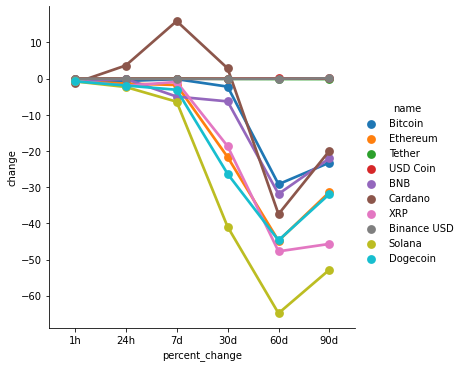

In [14]:
#Creating a cat plot showcasing the change in % value based on the individual crypto currency
#Quite a mess due to having 500 crypto currencies -> Not actually visually feasibly
sns.catplot(x='percent_change', y='change', hue='name', data=df4, kind='point')

As per 08.06.2022, if you have been following the crypto markets or generally the financial markets, you are aware they have taken quite a beating.
This is clearly vizualized in the graph above, with solana (out of the 10 shown, including stable coins) having seen the largest drop around 50% on the 90d horizon

In [18]:
#If we want to look at just one coin, lets say Solana, we can visualize that differently
#We create a new dataframe and simply look at the price
dfsol = df[['name','quote.USD.price','Timestamp']] #-> Show price at time run. 
dfsol = dfsol.query("name == 'Solana'") #method used to query rows returning a new dataframe -> Basically a subset of the dataframe
dfsol

,name,quote.USD.price,Timestamp
8,Solana,38.83560,NaT
8,Solana,38.83560,2022-06-08 19:09:02.505147
8,Solana,38.83149,2022-06-08 19:10:02.741895
8,Solana,38.83283,2022-06-08 19:11:02.932916
8,Solana,38.82930,2022-06-08 19:12:03.175915
8,Solana,38.83508,2022-06-08 19:13:03.368888
8,Solana,38.84489,2022-06-08 19:14:03.592932
8,Solana,38.86228,2022-06-08 19:15:03.782072
8,Solana,38.86385,2022-06-08 19:16:03.982739
8,Solana,38.86207,2022-06-08 19:17:04.221383


<AxesSubplot:xlabel='Timestamp', ylabel='quote.USD.price'>

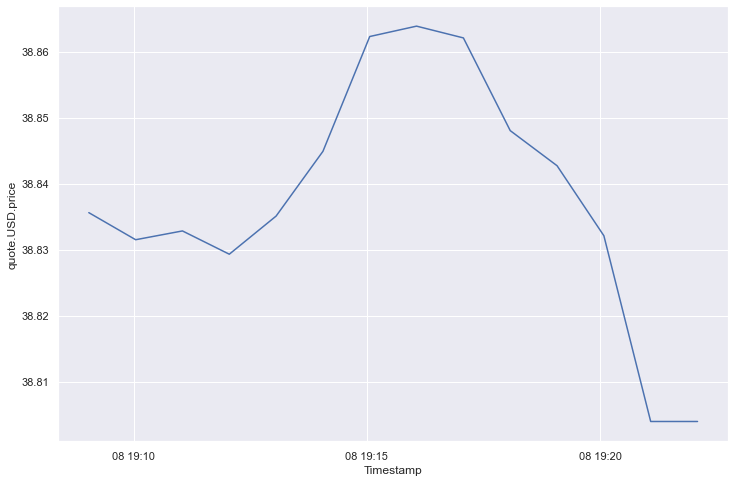

In [80]:
#Showcassing the price of solana minute by minute in a line chart.
sns.set_theme(style="darkgrid") #-> Setting the color scheme/style to be dark and also with grids.

sns.lineplot(x='Timestamp', y='quote.USD.price', data = dfsol)

This is taken over a short 10 minute timeframe or so. In reality it would be more interesting to collect and save data to CSV or other, to analyze data over a longer timeframe e.g., days, months etc.

# Additional insight
Ranking the crypto currencies by various methods and discussing visualization

In [108]:
#Since we have several columns and I assume number of pairs do not change, I get them as follows.
df_pairs = df.head(10)[['name','num_market_pairs']].sort_values(by='num_market_pairs',ascending=False)
df_pairs


,name,num_market_pairs
2,Tether,34464
0,Bitcoin,9526
1,Ethereum,5744
3,USD Coin,4320
7,Binance USD,3818
4,BNB,943
6,XRP,737
9,Dogecoin,483
5,Cardano,454
8,Solana,327


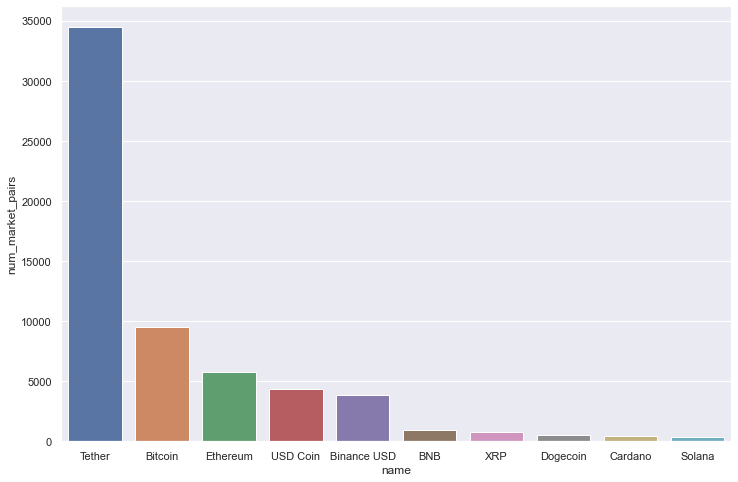

In [109]:
sns.set(rc = {'figure.figsize':(12,8)})
ax = sns.barplot(x='name', y='num_market_pairs', data=df_pairs)


What seems to be interesting here, is that Dogecoin, has more pairs than both Solana and Cardano.
This somehow proves that memes and popularity can go a far way, compared to real usage

In [110]:
df_ts = df.head(10)[['name','total_supply']].sort_values(by='total_supply',ascending=False)
df_ts

,name,total_supply
9,Dogecoin,132670764299.89409
6,XRP,99989535142.00000
2,Tether,79713622660.21223
3,USD Coin,53782885360.04607
5,Cardano,34277702081.60500
7,Binance USD,18013276339.46925
8,Solana,511616946.14229
4,BNB,163276974.63000
1,Ethereum,121098253.37400
0,Bitcoin,19062075.00000


[(13062075.0, 102670764299.0)]

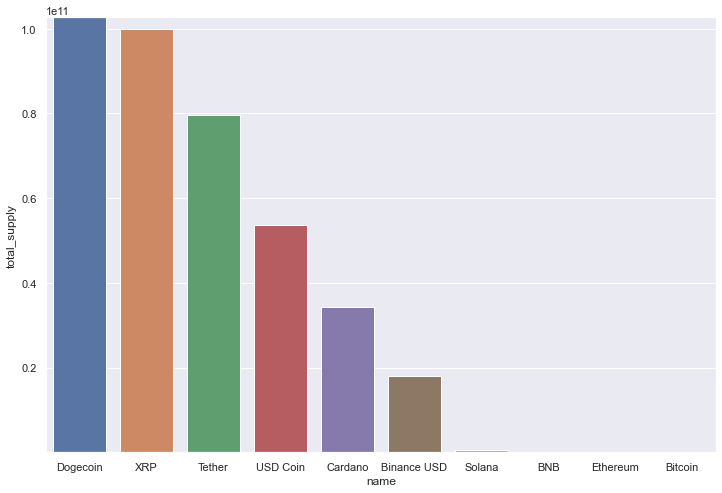

In [115]:
ax2 = sns.barplot(x='name', y='total_supply', data=df_ts)
ax2.set(ylim=(13062075,102670764299))

Due to some coins having incredibly high total supply, it completely nullifies the visualization of 4 coins.
As such it is better to simply see the ranking in the dataframe df_ts.

It would only be possible to visualize, if it was split in two, or the max Y limit was limited, allowing for the visualization of the bottom, but losing information on the top.

In [119]:
df_da = df.head(10)[['name','date_added']].sort_values(by='date_added',ascending=True)
df_da

,name,date_added
0,Bitcoin,2013-04-28T00:00:00.000Z
6,XRP,2013-08-04T00:00:00.000Z
9,Dogecoin,2013-12-15T00:00:00.000Z
2,Tether,2015-02-25T00:00:00.000Z
1,Ethereum,2015-08-07T00:00:00.000Z
4,BNB,2017-07-25T00:00:00.000Z
5,Cardano,2017-10-01T00:00:00.000Z
3,USD Coin,2018-10-08T00:00:00.000Z
7,Binance USD,2019-09-20T00:00:00.000Z
8,Solana,2020-04-10T00:00:00.000Z


While the date a coin was added to coinmarketcap is not a totally accurate indication of how old a coin it, it gives an idea of the approximate time. As such, we can see that Bitcoin is the oldest (based on the top 10 data drawn) and Solana is the youngest of the coins.

Knowing now that Dogecoin is older than both Cardano and Solana, it does make sense that it has more market pairs.

# Conclusion

Based on the data drawn, it could also be possible to analyze the 24 hour volume, to find which is more heavily traded, or  find which tag is most popular/common.

Ultimately, this project showcases how to easily automate getting data using an API. Having a server the code could run on would be beneficial, if the goal was to consistently gather data for analysis.

It also showcases some of the challenges when trying to visualize data with large disparities.